___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

Regression ve classification problemlerinin cok buyuk bir kismi Machine Learning modelleri ile cozulebilir. Buyuk datalarda calismak gerektiginde Deep Learning modelleri tercih edilir.

# Installing Tensorflow

In [5]:
!python --version

Python 3.7.12


In [83]:
#pip install tensorflow

In [7]:
#!pip install tensorflow==2.0

In [8]:
#!pip install --ignore-installed --upgrade tensorflow==2.5

In [9]:
#conda install -c anaconda keras

In [84]:
#!pip install keras==2.8.0

In [19]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [24]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

Iki feature' a gore price tahmini yapan bir model olusturacagiz. (Regression modeli)

In [25]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


feature1 ile price arasinda positive-weak, feature2 ile price arasinda positive-strong bir iliski var.feature1 ile feature2 arasinda hicbir iliski yok :

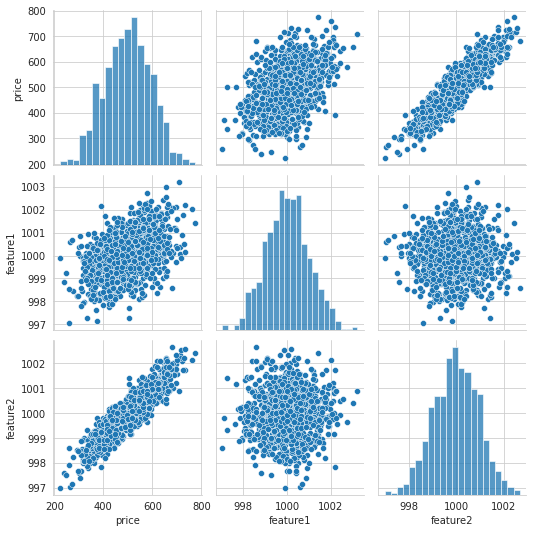

In [28]:
sns.pairplot(df);

In [29]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [30]:
from sklearn.model_selection import train_test_split

ML' den farkli olarak X ve y' de value degerleri aliniyor cunku DL modelleri datayi array halinde ister, DataFrame istemez. Cunku DL' de cok daha fazla parametre vardir ve cok daha fazla islem yapilir. Datanin array olmasi da hizi artirir. Value' lari almak yerine datayi scale edersek de ayni islemi yapmis oluruz :

In [31]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [32]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [33]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
X_train.shape

(700, 2)

In [36]:
X_test.shape

(300, 2)

DL' de genellikle MinMaxScaler kullanilir. DL' de islem yuku cok fazla ve MinMaxScaler, degerleri 0 ile 1 arasina sikistirir :

In [37]:
from sklearn.preprocessing import MinMaxScaler

__MinMaxScaler --->__ Ilgili sutundaki min ve max degerlerini alir, scale edilmek istenen degerden min degeri cikarir; bunu da max-min farkina boler. Boylece tum degerler 0 ile 1 arasina gelmis olur.

In [38]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [39]:
scaler = MinMaxScaler()

In [40]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)    # Train datasi icin hem fit hem transform
X_test = scaler.transform(X_test)      #Test datasi icin sadece transform

In [41]:
X_train.max()

1.0

In [42]:
X_train.min()

0.0

Test datasindaki degerler 0 ile 1 arasina gelmedi cunku scale islemini sadece traind datalarina uyguladik :

In [43]:
X_test.max()

1.0186515935232023

In [44]:
X_test.min()

-0.014108392024525074

## Modelling

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

__Sequential -->__ Arka arkaya katmanli bir yapi olusturmamizi saglayan alt yapi.

In [47]:
#help(Sequential)

__Dense -->__ Bir layer(katman) cinsidir. Dense, __fully connected__ bir ozellige sahip bir katman cesidi, en cok bunu kullanacagiz. CNN' de fully connected olmayan layer' lar kullanacagiz.

In [48]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

Model olusturmak icin 2 yontem gorecegiz :

__1. Yontem :__ Modeli Sequential' a atadik. Icerisine liste icinde kac layer olusturmak istiyorsak icine atadik. Her bir dense bir layer' i temsil eder. Son satir output layer' dir. Input layer belirtilmemis, belirtmeye de gerek yok. Model, kac tane input yani feature oldugunu biliyor :

In [49]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

__2. Yontem :__ Genelde tercih edilen yontem budur. Yine Sequential olarak modelimizi tanimlayip bir object olusturduk. Object' in uzerine layer' lari add fonksiyonu ile ekledik :

In [50]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1] --> Input layer eklenebilirdi.
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

__unit :__ Bir katmanda kac nöron oldugunu soyler. Genelde 2 ve 2' nin katlari seklinde nöron sayilari verilir. 

__activation :__ Aktivasyon fonksiyonu

Modelimizde 2 tane feature var. birinci hidden layer' da 4 nöron, ikinci hidden layer' da 4 nöron, ucuncu hidden layer' da 4 tane nöron var. Son olarak da 1 tane output var. 

Yukarida structure' i olusturduk. Bu structure' in icinde hangi yontemleri kullanarak calisacak, compile ile bunu belirliyoruz :

__optimizer :__ Gradient Descent uygulayarak min cost' u bulmaya calisir ve sonra agirliklari sondan basa dogru gunceller.

__loss :__ Hangi cost function' i kullanacagimizi buraya yazariz. (Regression problemlerinde genelde mse kullanilir, birden fazla skor tanimlanabilir. Mesela classification problemlerinde recall, accuracy.. skorlari tanimlanabilir.)

In [51]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem :
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
-----------------------------------------------------------------------------
    # For a binary classification problem :
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
------------------------------------------------------------------------------
    # For a mean squared error regression problem :
    
    model.compile(optimizer='rmsprop',
                  loss='mse')

Yukarida yapiyi kurduk, compile ile nasil calismasi gerektigini soyledik, egitim asamasina gecebiliriz :

__batch_size :__ Kac observation' da bir backpropagation yapilacak?

__epoch :__ Datanin tamami kac kere egitime girsin? (Her yeni egitimde data karılır.)

In [52]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256572.2344
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256434.1094
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256307.5938
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 256174.2656
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256027.0000
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 255862.3281
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 255677.2344
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255471.1094
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255241.9688
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 254986.8281
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254705.0781
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

__Ciktidaki 22 sayisi :__ Train datasinda 700 gozlem var. 700 / 32 = 22 (Aslinda sonuc 21.875 cikiyor fakat egitim yarim kalmasin diye son  kalan verileri batch' e atarak sayiyi 22' ye tamamliyor.). Boylece her epoch' da 22 kere backpropagation yapti. Her iterasyonda da 32 data kullandi.

__Ciktidaki loss :__ 22 tane datadan 22.' sinin loss degeri, yani epoch' un en sonuncu iterasyonu (Ortalama degil!)

__loss:__ Gozlemdeki hata degeri. (Burda mse kullandigimiz icin hata degerlerinin karesi)

ilk satir egitime girer, bir hata degeri bulunur; ikinci satir girer bir hata degeri bulunur; en son 32. satir girer bir hata degeri bulunur (batch_size=32) ve bu hata degerlerinin hepsinin ortalamasi alinir. Bu ortalama degere gore bir turev degeri alinir, gradient descent calisir. Buna gore parametreleri gunceller. Boylece 1/22' nci islemi yapmis olur. Yenilenmis parametreler ile 32. dataya, 33. dataya 64. dataya kadar ayni islemleri tekrar eder. 64. 'de tekrar hata degerlerinin ortalamasini alir, turev degerlerini bulur.. Bu sekilde datanin sonuna kadar bu islemleri tekrar eder.

Ciktidaki loss degerlerinin (hata) baslangicta cok fazla oldugunu, egitim devam ettikce asagiya dogru azaldigini goruyoruz. Baslangictaki buyuk hatanin sebebi; basta atanan rastgele agirlik degerleridir. 

-----------------------------------------------------------------------------------------------------------------------------------

__model.summary :__ Her katmanda kac tane parametre oldugunu verir. Burada toplamda 57 tane parametre var. Her iterasyonda bu 57 parametre guncellenir. 

Ilk katmanda 12 tane parametre oldugunu goruyoruz. Bu sayi su sekilde hesaplaniyor : Baslangicta 2 feature vardi. Bu feature' lar ilk katmandaki 4 nöronun her birine giderse 4*2=8 tane agirlik degeri olur, her nöronda birer tane de bias degeri var, bunu da eklersek 8+4=12 degeri bulunur.

Ikinci katmandaki hesap : Onceki katmanda 4 nöron var, bu nöronlar sonraki 4 nöronun her birine giderse 4*4=16 tane agirlik degeri hesaplanir, 4 tane de bias degerini eklersek 16+4=20 tane parametre bulunur.

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


__model.weights :__ Yukarida gordugumuz 57 tane parametrenin agirlik ve bias degerlerinin neler oldugunu her layer icin ayri ayri goruyoruz. (Mesela ilk layer icin 8 tane agirlik degeri, 4 tane bias degerinin kac olduklari bilgisi gibi.)

In [54]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.9360819 , -0.69013476,  1.4532725 ,  2.458666  ],
        [-0.18206072, -0.5093844 ,  4.0017343 ,  4.1542587 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.        , 0.73505205, 0.8598636 ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.7245514 , -0.68709385, -0.28074658,  0.4290933 ],
        [-0.51076454, -0.46946758,  0.10615349, -0.48621386],
        [-0.11419952,  2.5167308 ,  2.7411494 ,  1.668273  ],
        [-0.86266583,  3.1310482 ,  3.077746  ,  2.4184818 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.83497316, 0.8005237 , 0.8423865 ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.7394846 , -0.74377495,  0.16349596,  0.26095206],
        [ 2.4133186 , -0.8025178 , -0.33

__model.history.history :__ Model egitilirken aldigimiz loss degerleri ne ise aynisini bu kod ile goruntuleyebiliyoruz. 250 tane epoch oldugu icin 250 tane loss degeri elde ettik :

In [55]:
model.history.history

{'loss': [256572.234375,
  256434.109375,
  256307.59375,
  256174.265625,
  256027.0,
  255862.328125,
  255677.234375,
  255471.109375,
  255241.96875,
  254986.828125,
  254705.078125,
  254392.65625,
  254047.9375,
  253670.265625,
  253256.3125,
  252805.171875,
  252313.234375,
  251779.0,
  251198.921875,
  250572.9375,
  249895.125,
  249165.140625,
  248382.484375,
  247541.59375,
  246638.375,
  245681.84375,
  244653.921875,
  243553.328125,
  242386.46875,
  241144.0625,
  239826.171875,
  238429.0,
  236951.953125,
  235397.6875,
  233750.171875,
  232010.765625,
  230180.1875,
  228266.21875,
  226246.8125,
  224121.03125,
  221900.484375,
  219584.34375,
  217156.046875,
  214608.09375,
  211987.078125,
  209233.828125,
  206363.90625,
  203379.453125,
  200292.5,
  197102.90625,
  193781.28125,
  190330.21875,
  186787.890625,
  183125.140625,
  179333.453125,
  175428.484375,
  171441.65625,
  167313.421875,
  163052.546875,
  158699.046875,
  154278.484375,
  149741.0

Bu loss degerlerini gorsellestirerek overfit veya underfit durumu var mi diye kontrol etmek icin gorsellestirme yapacagiz. Bu yuzden oncelikle DataFrame' e cevirdik :

In [56]:
pd.DataFrame(model.history.history)

,loss
0,256572.234
1,256434.109
2,256307.594
3,256174.266
4,256027.000
...,...
245,24.314
246,24.342
247,24.213
248,24.183


Asagida modelimizin nasil bir ogrenme egrisi oldugunu goruyoruz. Modelimiz yaklasik olarak 80' de stabil bir duruma gelmis. Tam olarak hangi deger oldugunu gormek icin bir sonraki grafikte x ve y' ye limitler koyduk. Ayrintili grafikte degerimizin istedigimiz noktaya 200 gibi bir degerde ulastigini goruyoruz. (Baslangictaki agirliklar random olarak atandigi icin 200 sayisi model her calistiginda degisebilir!) Demek ki epoch degerini 250 yerine 200 olarak girerek zamandan tasarruf saglayabiliriz :

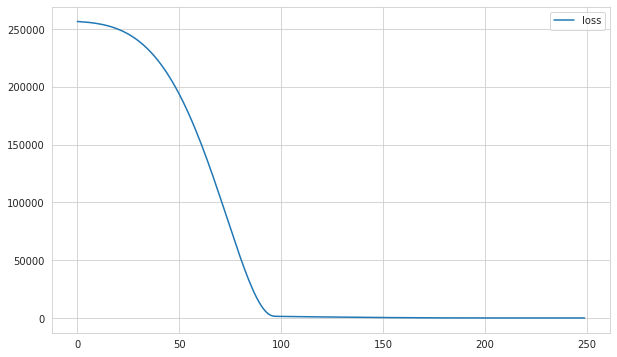

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

(0.0, 3000.0)

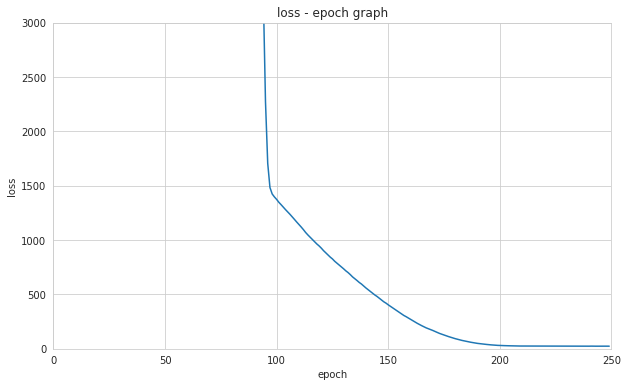

In [58]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

Bir regression problemi ile ugrastigimiz icin ayni ML' deki gibi error metriklerimizi import ettik :

__explained_variance_score :__ r2 skoru ile ayni, aralarinda cok ufak farklar var. 

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

__model.evaluate__ ciktisinda aldigimiz deger, yukarida compile kisminda tanimladigimiz loss='mse' skorudur. Oraya hangi skor tanimlandiysa burda o sonucu aliriz. 

In [60]:
model.evaluate(X_train, y_train, verbose=0)

23.757612228393555

model.evaluate' ten aldigimiz train ve test set skorlari birbirleri ile tutarli cikti. 

__!!!__ model.evaluate daha prediction yaptirmadan otomatik olarak arka planda prediction yaptirir.  __!!!__

In [61]:
model.evaluate(X_test, y_test, verbose=0)

25.330738067626953

In [62]:
y_pred = model.predict(X_test)

Test setine prediction yaptirdik ve skorumuzu aldik; skorumuz gayet iyi.

In [63]:
explained_variance_score(y_test, y_pred)

0.9971566368986389

Actual value' lar ile prediction' larin 10 tanesini DataFrame' de karsilastirmak istedik. Bunun icin once bir dict olusturup bunu DataFrame' e cevirdik. y_pred' de reshape yapmamizin sebebi; y_pred bir listeydi bunun formatini reshape ile tek bir sütun haline getirdik :

In [64]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
159,403.063,395.657
50,514.895,517.763
244,528.129,532.237
7,464.116,459.536
143,357.296,357.441
58,455.140,447.502
19,565.192,566.074
129,492.873,493.991
264,400.635,398.968
36,507.443,502.369


Actual ve predict degerleri birbirine cok yakin cikti, modelimiz cok iyi tahminler yapmis.

Actual ve predict degerlerine bir de gorsellestirerek baktik :

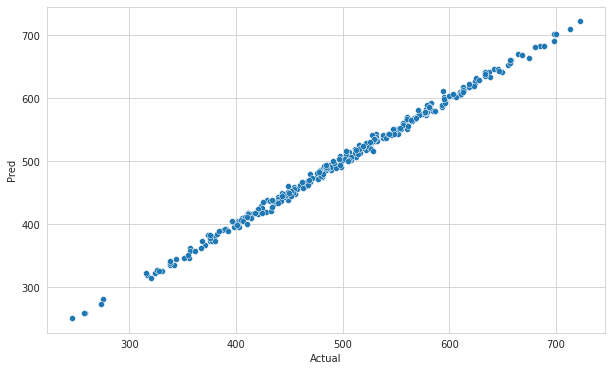

In [65]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

eval_metric ile skorlarimiza baktigimizda r2_score ile yukarida aldigimiz explained_variance_score degerlerinin birbirine cok yakin oldugunu goruyoruz. Ikisinin hesaplanmasinda cok kucuk farklar oldugunu belirtmistik. Birbirlerinin yerlerine kullanilabilirler :

In [66]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [67]:
eval_metric(y_test, y_pred)

r2_score: 0.9971188977928009 
mae: 4.047471182686836 
mse: 25.33074183698437 
rmse: 5.032965511205533


## Final Model and Model Deployment

ML' de yaptigimiz gibi full datamiz ile model egitimimizi yapiyoruz. Once tum X datamizi scale ettik. Pickle ile scale edilmis datamizi baska yerde de kullanabilmek adina dump ettik. Scale edilmis datamizi transform ettik ve sonrasinda yukarida kullandigimiz ozellikleri kullanarak tum datamizi modele soktuk :

In [68]:
scaler = MinMaxScaler().fit(X)

In [69]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [70]:
X_scaled = scaler.transform(X)

Model egitimi yaparken cok iyi skorlar almis olmamiza karsin burda kotu skorlar alabiliriz (yuksek ve dusmeyen loss degerleri). Bunun sebeplerin arasinda, ilk agirliklarin random atanmasi olabilir; relu kullandigimiz icin ölü nöronlar olabilir; farkli bir noktadan basladigi icin global min'e ulasamamis olabilir. Bu durumda asagidaki dusuk loss degerleri alana kadar kodu tekrar tekrar calistirmaliyiz. Egitimdekine benzer sonuclar aldiysak modelimizi kaydedebiliriz. Yani Deep Learning' de iyi skorlar elde etmek şans işidir :

In [71]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257190.7812
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 256967.3906
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 256721.0938
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 256443.3281
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 256112.1562
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 255696.3438
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 255200.3125
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 254612.4688
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 253919.5156
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 253109.5312
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 252172.0312
Epoch 12/250
32/32 [==============================] - 0s 1ms/st

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [72]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

Modelimizi save yontemiyle kaydedebiliriz. ML' den farkli olarak h5 uzantisi ile kaydetmeliyiz. Bu sekilde agirlik ve bias' lar daha az yer kaplayacak sekilde muhafaza edilir.

## Prediction-1

In [73]:
from tensorflow.keras.models import load_model

Prediction icin load_model' import ettik ve bunun ile kaydettigimiz modelimizi cagirdik ve bir degiskene atadik :

In [74]:
model_fake_reg = load_model('model_fake_reg.h5')

Pickle ile dump ettigimiz scaler' i da cagirdik ve bunu da bir degiskene atadik :

In [75]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

Array olarak sample' larimizi belirledik (Yapimiz array olmali) (2 feature oldugu icin her feature icin bir deger girdik) :

In [76]:
sample = [[998, 1000]]

sample' ı scale ve transform ettik ve sonrasinda prediction'i yaptirdik :

In [77]:
sample_scaled = scaler_fake_reg.transform(sample)

In [78]:
model_fake_reg.predict(sample_scaled)

array([[419.02872]], dtype=float32)

## Prediction-2

Burdaki gibi birden fazla sample da verebiliriz. Sample' lari scale ettigimizde zaten array olacaklari icin yukaridaki gibi scale etmemize de gerek yok. Asagidaki gibi sadece scale islemi yapip prediction' lari alabiliriz :

In [79]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [80]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [81]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [82]:
model_fake_reg.predict(sample_scaled)

array([[378.96152],
       [330.65106],
       [282.34055],
       [234.03008],
       [186.01265]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___